## Problem Statement: 
- This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. 

### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step1: Importing required Libraries

In [419]:
#imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [420]:
# Suppress all warnings
warnings.filterwarnings('ignore')

## Step2: Reading Dataset and Understanding Data

In [421]:
# Load the dataset
file_path = 'day.csv'
bikeSharing_df = pd.read_csv(file_path)

In [422]:
#check the shape
bikeSharing_df.shape

(730, 16)

In [423]:
# Display basic information 
print(bikeSharing_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [424]:
bikeSharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [425]:
# Display basic descriptive statistics
print(bikeSharing_df.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.5448

### Actionable Insights
- Handling Outliers: Extreme values in cnt may need to be addressed, either by capping or removing outliers.
- Data Cleaning: Impute or correct missing values in Seats, Mileage, Engine, and Power. Consider dropping New_Price if the missing values are too high to impute reliably.
- Feature Transformation: Convert Mileage, Engine, Power to numerical formats if they are currently in string format with units.

- Analysis and Visualization: Plot histograms and boxplots to visualize distributions and identify skewness or anomalies.
- Correlation heatmaps to understand the relationships between features and the target variable Price.
- Introduce derived column as days_old variable which indicates how old is the business

In [426]:
#check the columns of data
bikeSharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [427]:
#check the size of data
bikeSharing_df.size

11680

In [428]:
#check the datatypes of data
bikeSharing_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [429]:
#check the axes of data
bikeSharing_df.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [430]:
#check the dimensions of data
bikeSharing_df.ndim

2

In [431]:
#check the values of data
bikeSharing_df.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

# Step3: Cleaning Data
3.1 Drop columns that are not useful for analysis
- instant is just a row instance identifier.
- dteday is removed as we have some of date features like mnth and year and weekday already in other columns and also for this analysis we will not consider day to day trend in demand for bikes.
- casual and registered variables are not available at the time of prediction and also these describe the target variable cnt in a very trivial way target = casual + registered, which can lead to data leakage.


Before dropping date, let us introduce a days_old variable which indicates how old is the business

In [432]:
bikeSharing_df['days_old'] = (pd.to_datetime(bikeSharing_df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [433]:
#Inspect once
bikeSharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [434]:
# Droping instant column as it is index column which has nothing to do with target
bikeSharing_df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bikeSharing_df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columns as well as these are not feature variable and we have cnt column which is sum of the both that is the target column
bikeSharing_df.drop(['casual'], axis = 1, inplace = True)
bikeSharing_df.drop(['registered'], axis = 1, inplace = True)

In [435]:
#Inspect data frame after dropping
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [436]:
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [437]:
bikeSharing_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [438]:
bikeSharing_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [439]:
bikeSharing_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534,-0.000023
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542,-0.004619
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


In [440]:
# Observation
# we can see that features like season, mnth, weekday and weathersit are integers although they should be non-numerical categories.


In [441]:
#Look for missing value and print null counts by column
bikeSharing_df.isnull().sum()


season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days_old      0
dtype: int64

#### _`Inference`_:
- There are no null values.
- We can see that features like season, mnth, weekday and weathersit are integers although they should be non-numerical categories.

# 3.3 Handle Outliers

In [442]:
### Handle Outliers
bikeSharing_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

In [443]:
#Print number of unique values in all columns
bikeSharing_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

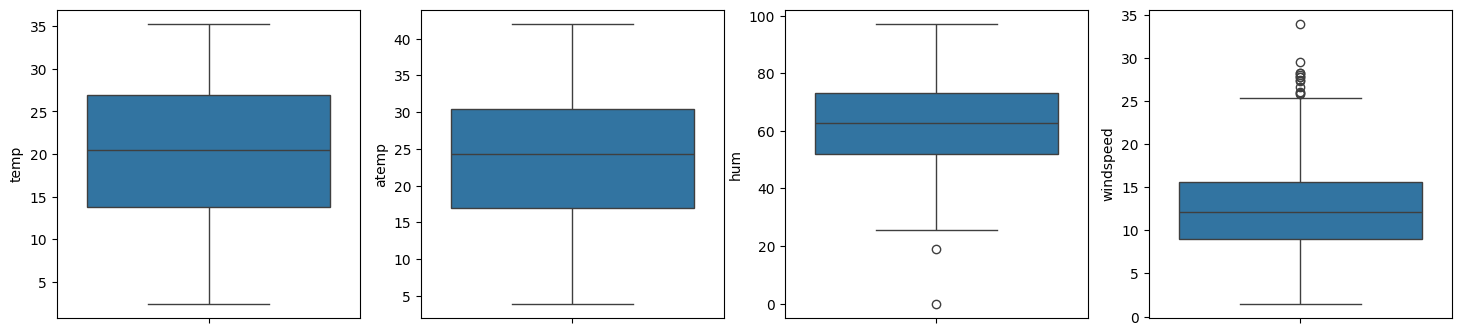

In [444]:
# Draw box plots for independent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikeSharing_df)
    i+=1

#### _`Inference`_:
- From these plots, we can see there are no visible outliers to be handled, so we are good to proceed without outliers handling in the provided data set


## 4. EDA



4.1 Convert numerical columns which needs conversion to categorical types

In [445]:
bikeSharing_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikeSharing_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bikeSharing_df.mnth = bikeSharing_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bikeSharing_df.weekday = bikeSharing_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


4.2 Draw pair Plots to check the linear relationship

<Figure size 1500x3000 with 0 Axes>

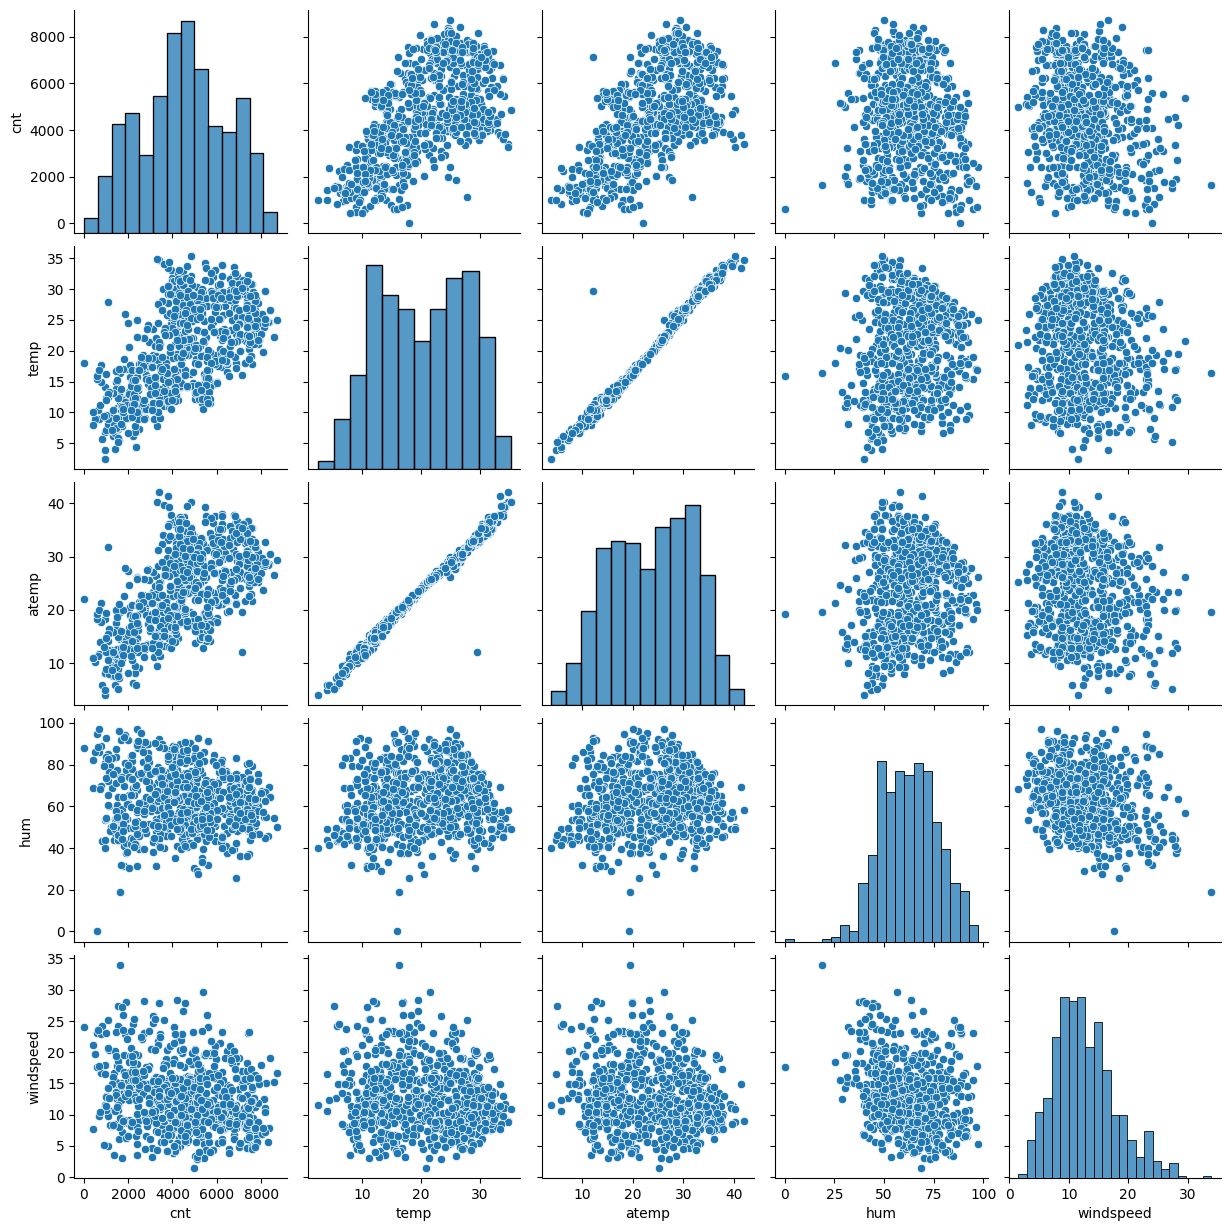

In [446]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bikeSharing_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### _`Inference`_:
- Looks like the temp and atemp has the highest corelation with the target variable cnt
- temp and atemp are highly co-related with each other
- As seen from the correlation map, output variable has a linear relationship with variables like temp, atemp.

4.3 Visualise Data to find Correlation between Numerical Variables

<Figure size 2000x1500 with 0 Axes>

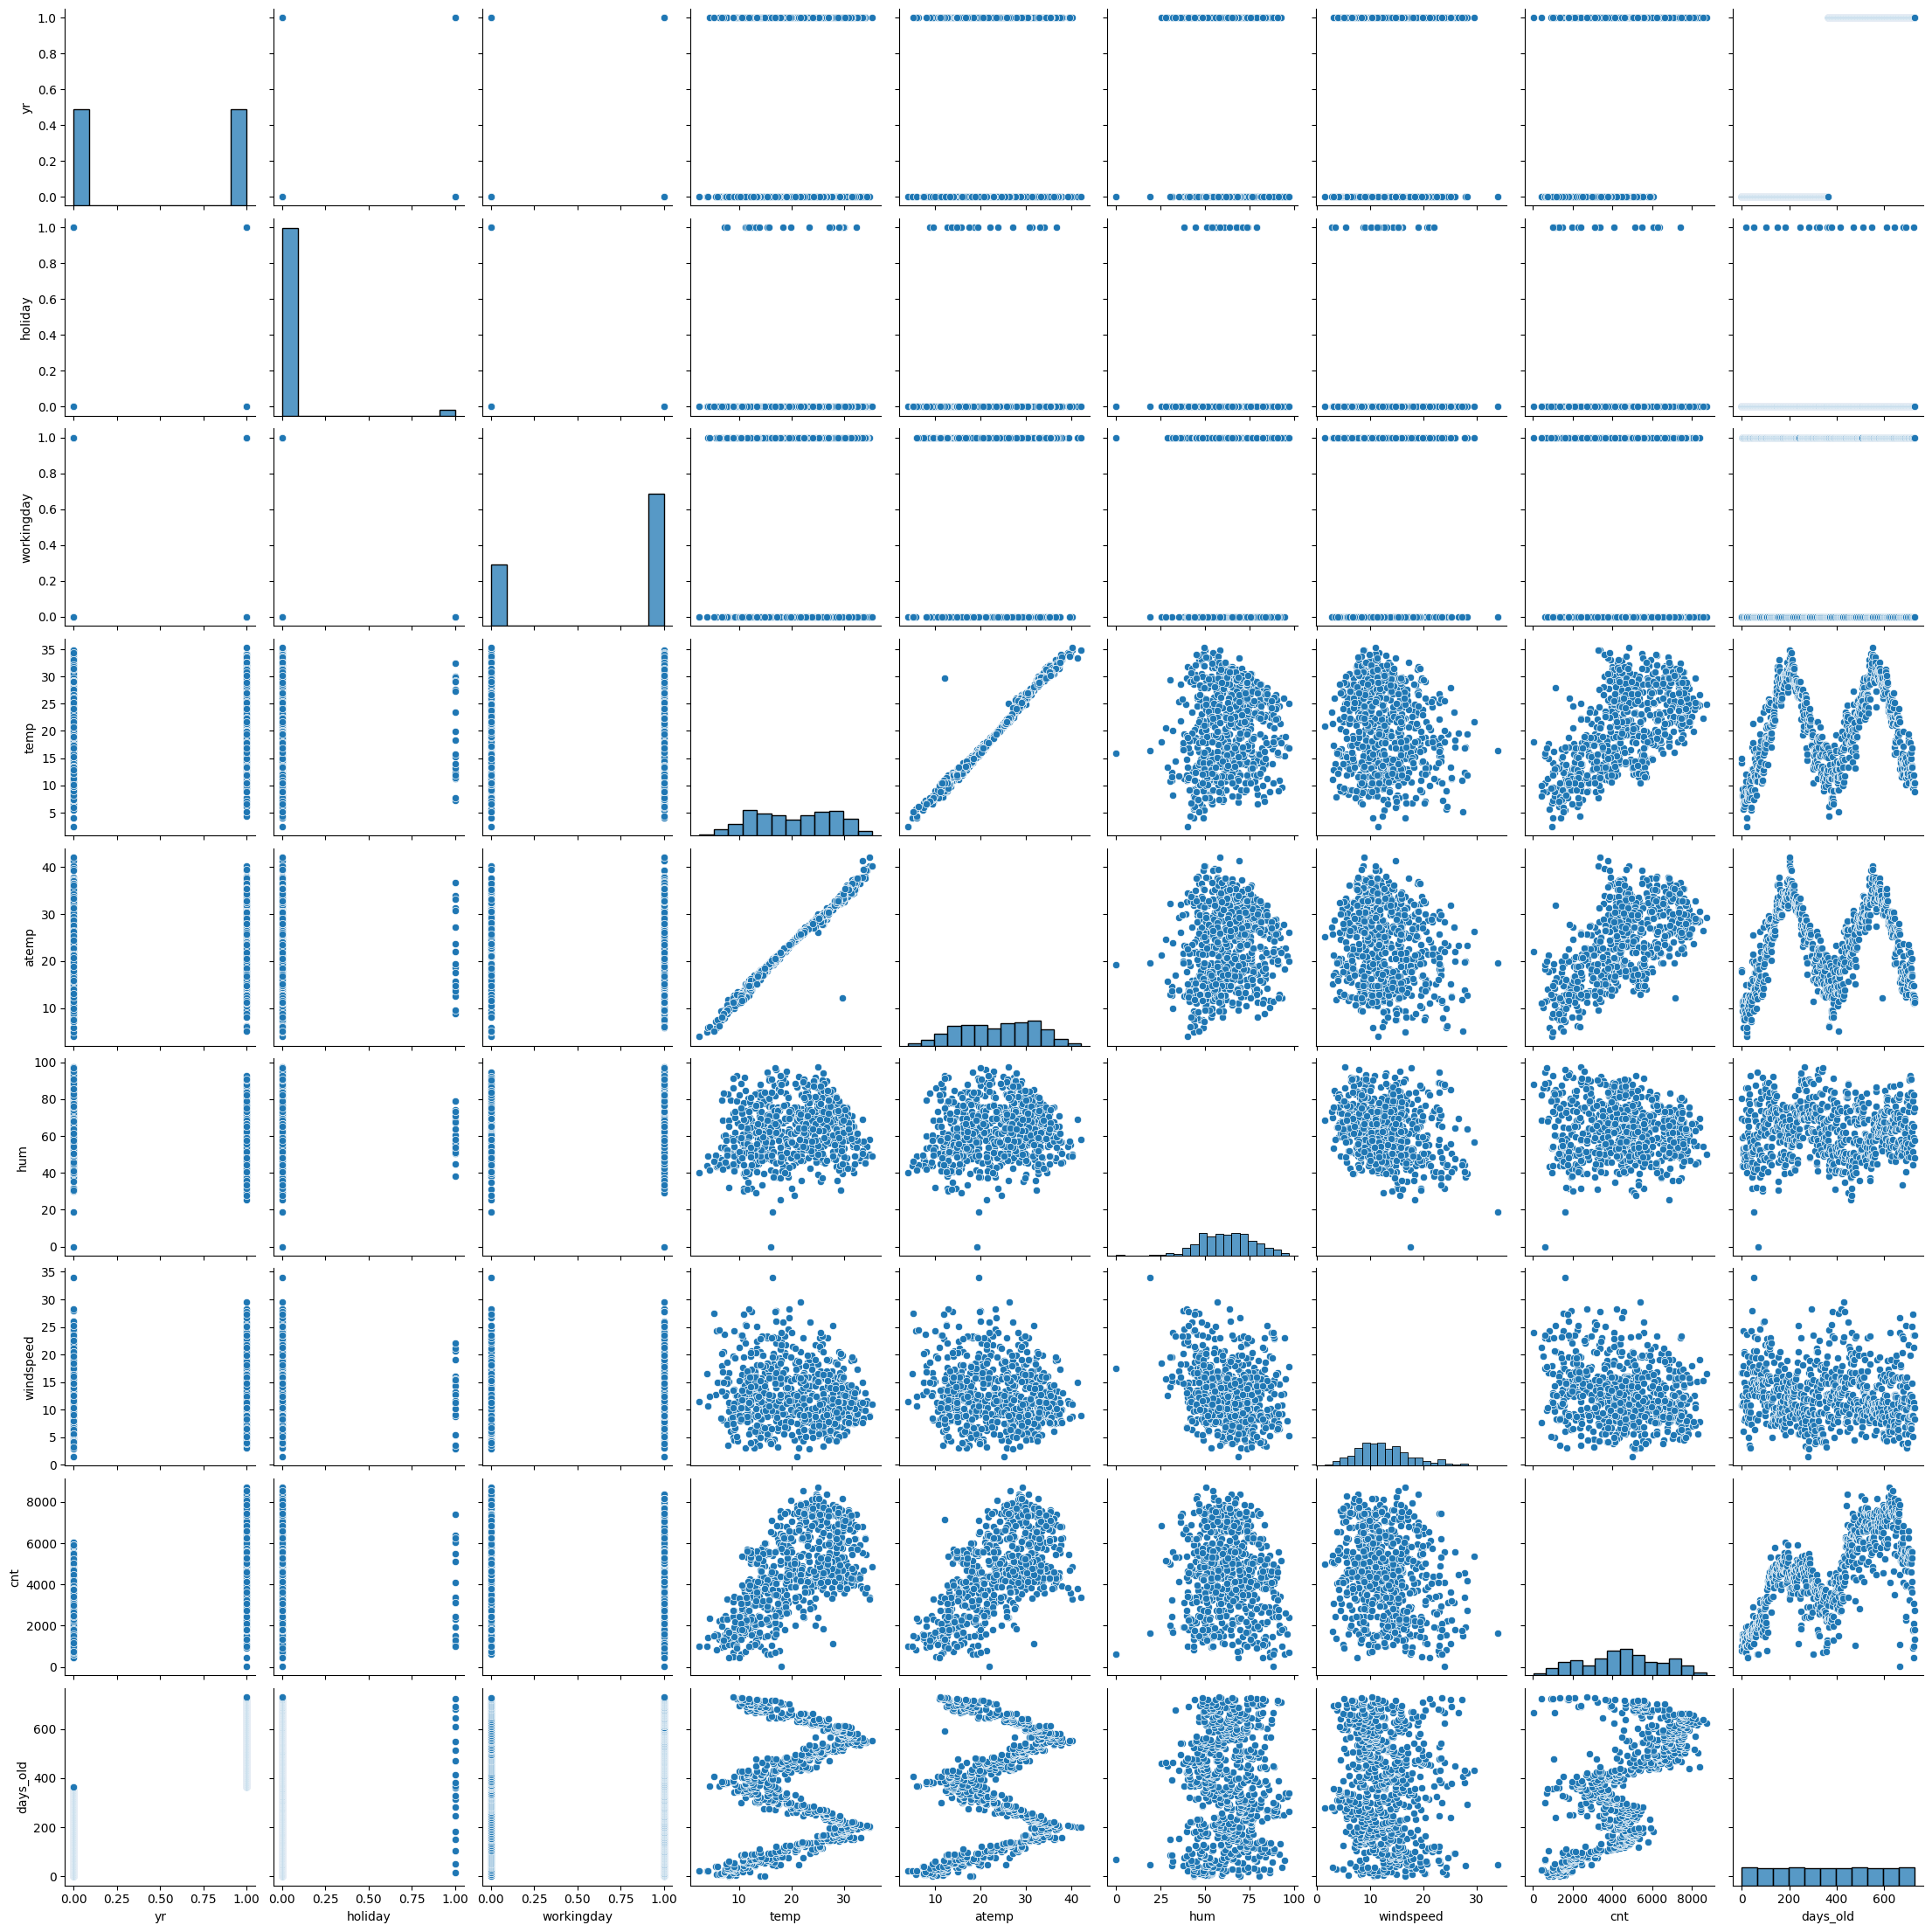

In [447]:
plt.figure(figsize=(20,15))
sns.pairplot(bikeSharing_df)
plt.show()

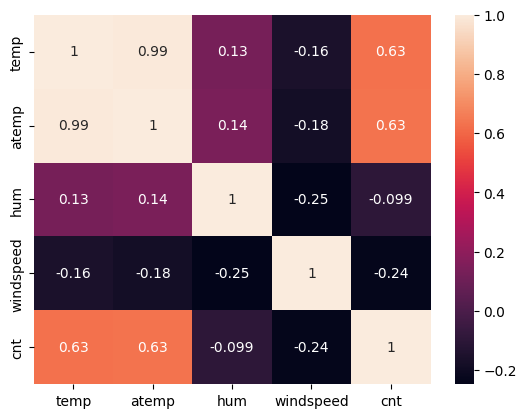

In [448]:
# Checking continuous variables relationship with each other
sns.heatmap(bikeSharing_df[['temp','atemp','hum','windspeed','cnt']].corr(), cbar=True, annot = True)
plt.show()

#### _`Inference`_:
- Here we see that temp and atemp has correlation more than .99 which means almost 1 (highly correlated) and atemp seems to be derived from temp so atemp field can be dropped here only


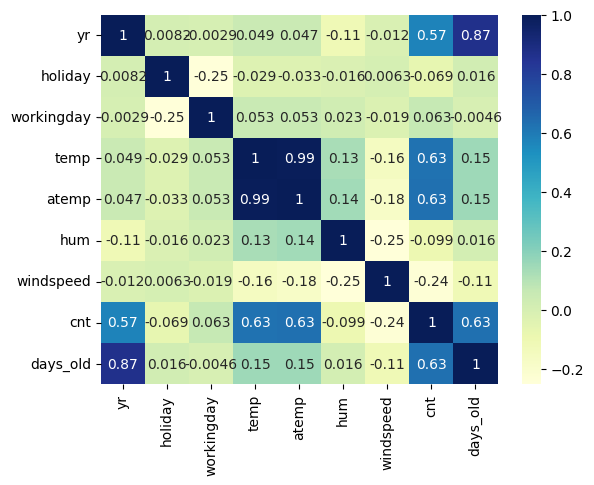

In [449]:
#Correlations for numeric variables
cor=bikeSharing_df.corr()
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

4.4 Draw Heatmap of correlation between variables

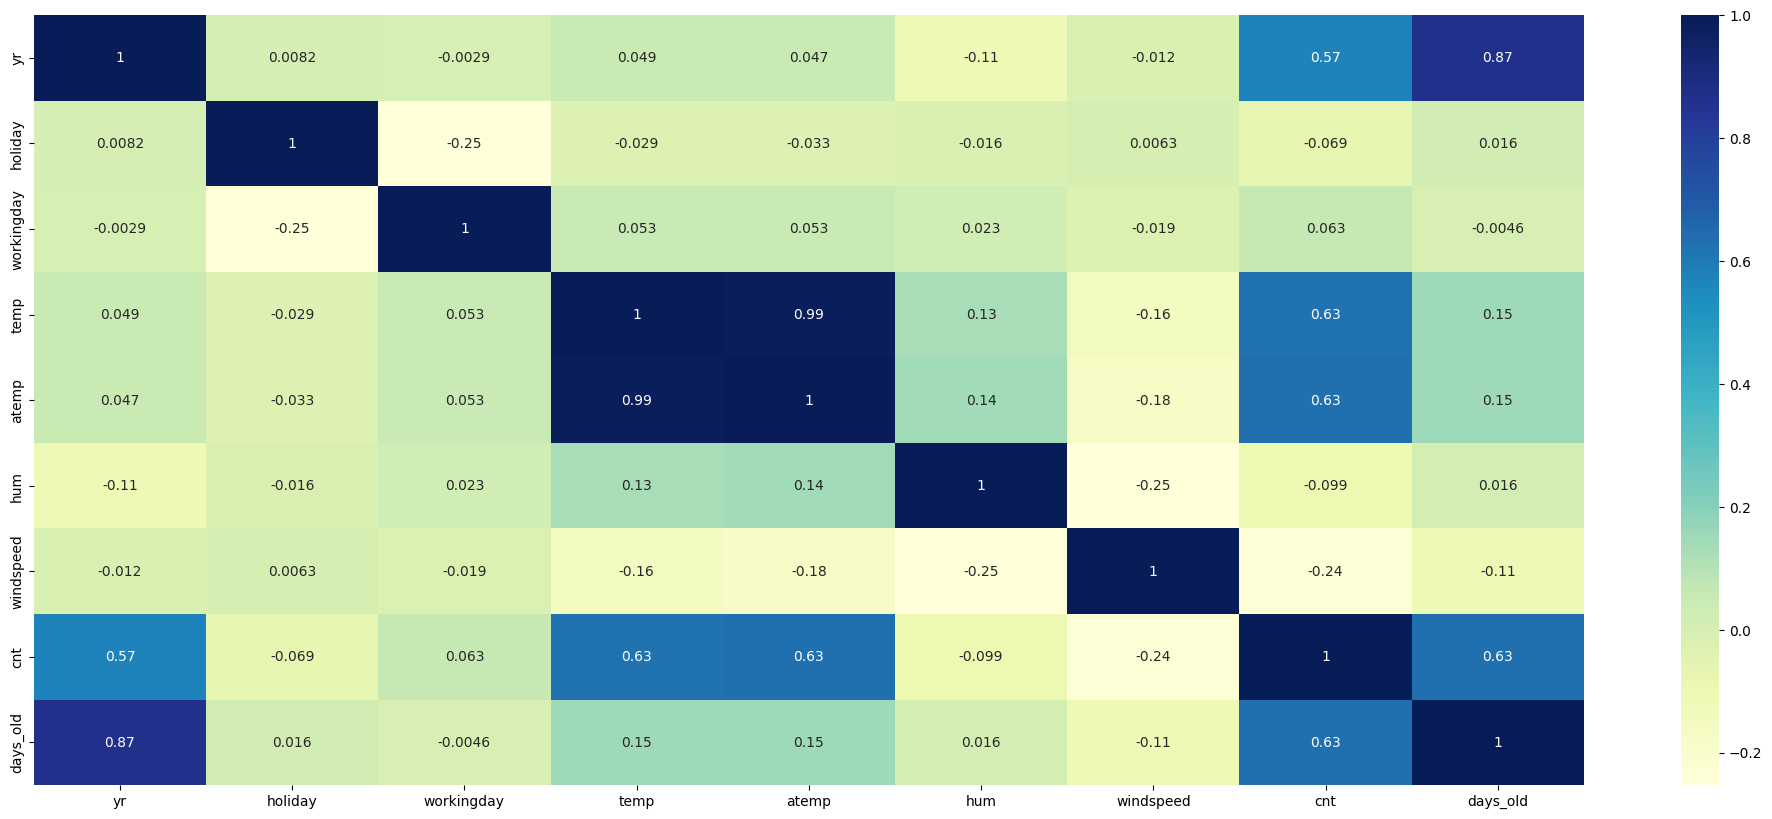

In [450]:
#Calculate Correlation
corr = bikeSharing_df.corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

#### _`Inference`_:
- From the correlation map, temp, atemp and days_old seems to be highly correlated and only should variable can be considered for the model, However let us elminate it based on the Variance Inflation Factor later during the model building.
- We also see Target variable has a linear relationship with some of the  indeptendent variables. Good sign for building a linear regression Model.


#### 4.5 Analysing Categorical Variabels with target variables 

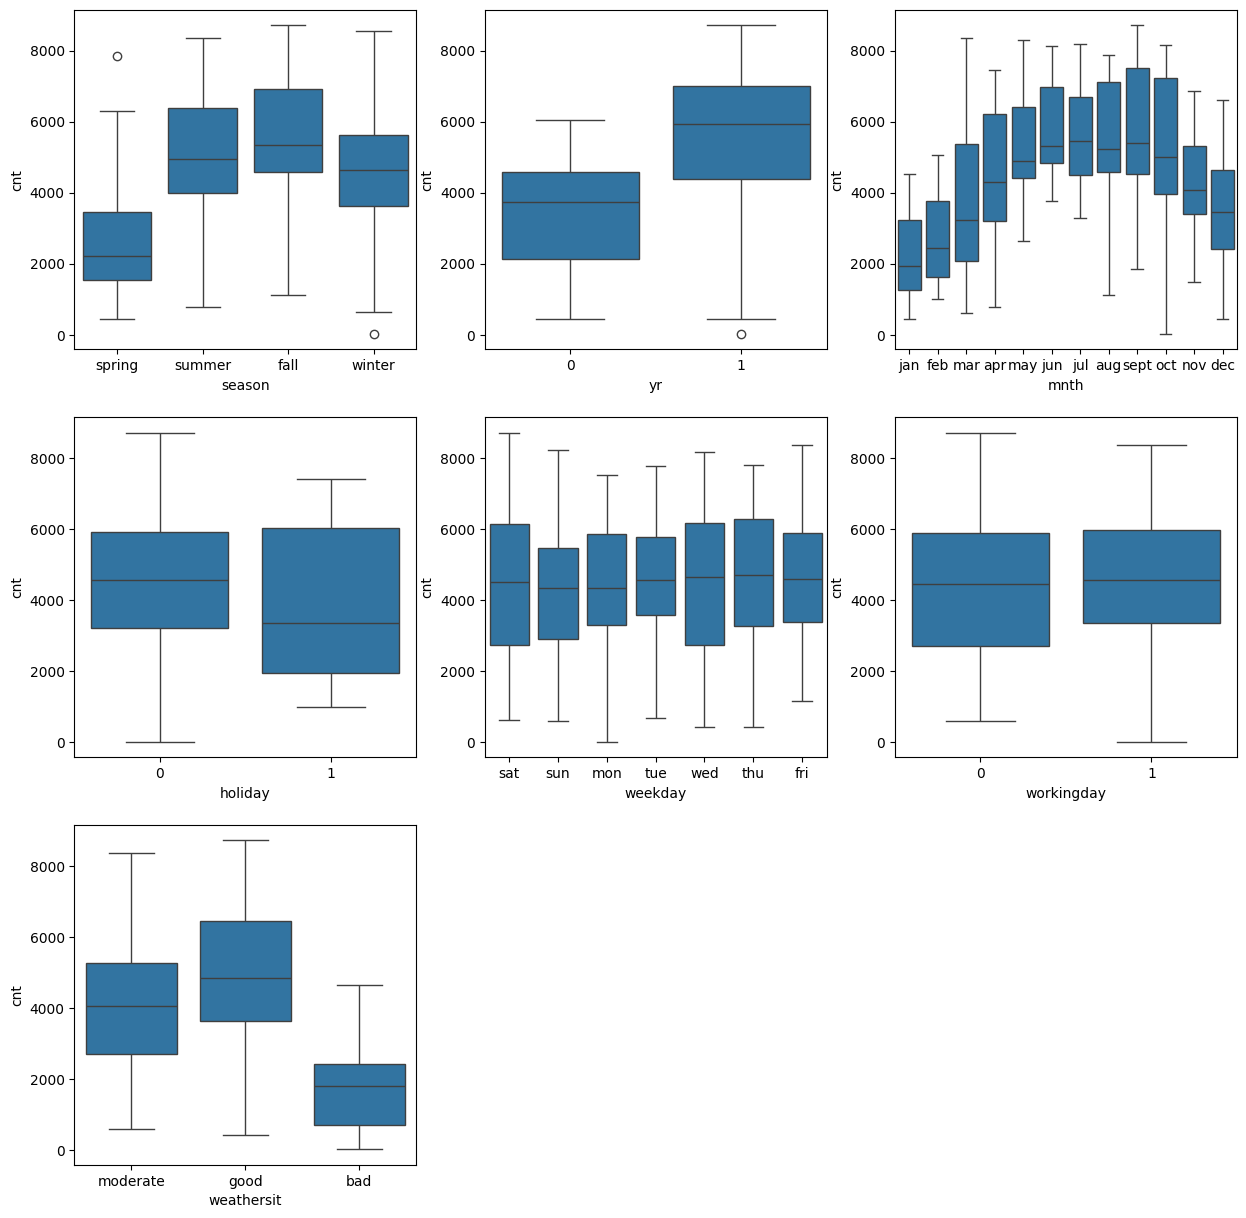

In [451]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikeSharing_df, x=i[1], y='cnt')
plt.show()

#### _`Inference`_:
Here many insights can be drawn from the plots

1. Season: 3:fall has highest demand for rental bikes
2. Demand for next year has grown
3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing
4. When there is a holiday, demand has decreased.
5. Weekday is not giving clear picture about demand.
6. The clear weathersit has highest demand
7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions

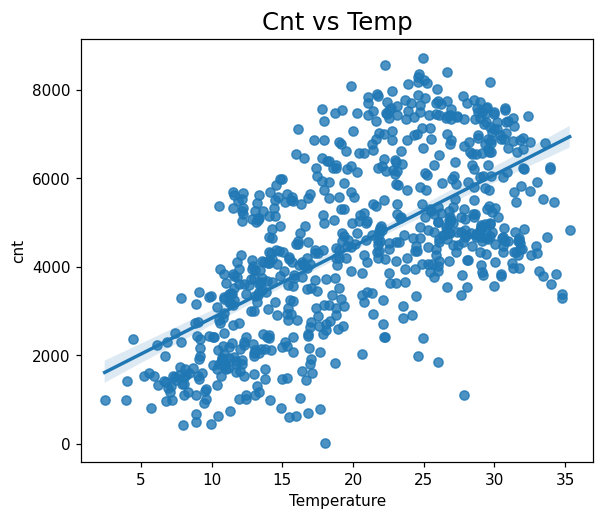

In [452]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

#### _`Inference`_:
- Demand for bikes is positively correlated to temp.
- We can see that cnt is linearly increasing with temp indicating linear relation.

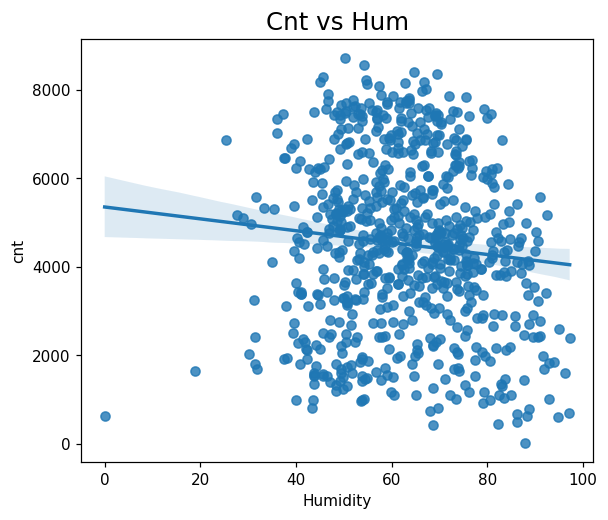

In [453]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

#### _`Inference`_:
- Hum values are more scattered around, although we can see cnt decreasing with increase in humidity.

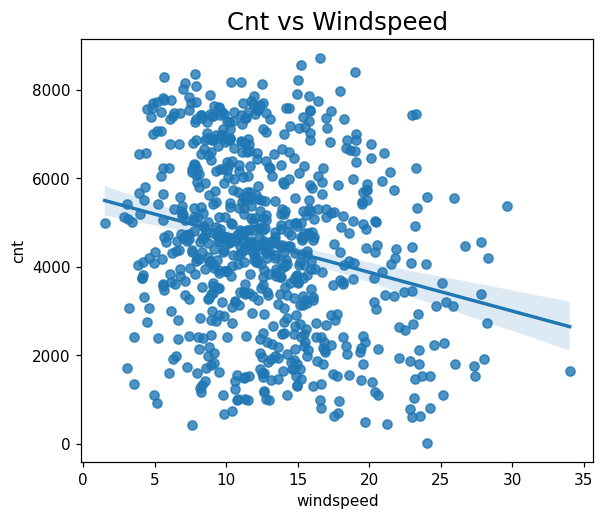

In [454]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="windspeed")
plt.show()

#### _`Inference`_:
- Windspeed values are more scattered around, although we can see cnt decreasing with increase in windspeed.

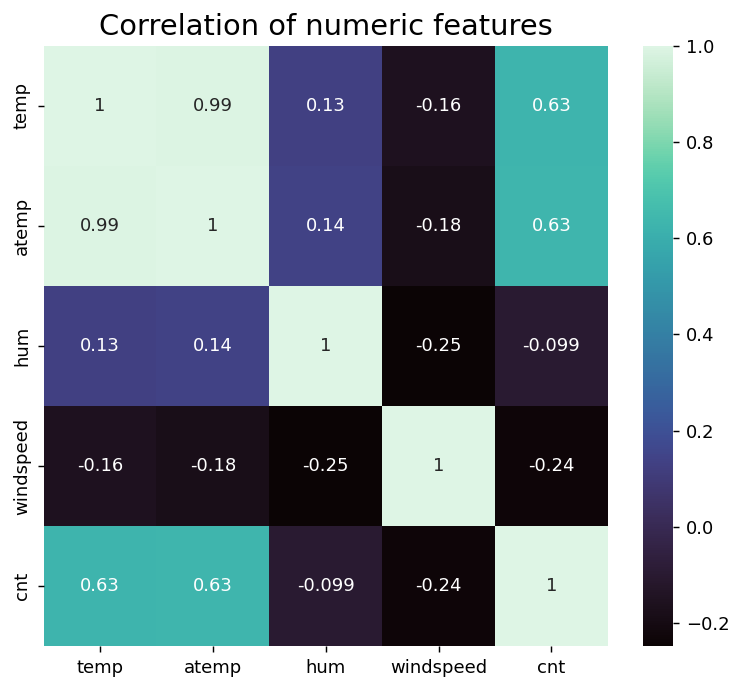

In [455]:

num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(7,6),dpi=130)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(bikeSharing_df[num_features].corr(),annot= True,cmap="mako")
plt.show()

#### _`Inference`_:
- Temp and Atemp are highly correlated, we can take an action to remove one of them, but lets keep them for further analysis.
- Temp and Atemp also have high correlation with cnt variable.

In [456]:
bikeSharing_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000


# 5. Data Preparation for Linear Regression 

#### 5.1 Create dummy variables for all categorical variables

In [457]:
bikeSharing_df = pd.get_dummies(data=bikeSharing_df,columns=["season","mnth","weekday"],drop_first=True)
bikeSharing_df = pd.get_dummies(data=bikeSharing_df,columns=["weathersit"])

- Dropping the first columns as (p-1) dummies can explain p categories.
- In weathersit first column was not dropped so as to not lose the info about severe weather situation.

In [458]:
#Print columns after creating dummies
bikeSharing_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [459]:
#Print few rows to inspect
bikeSharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,1,0,1,0


# 6. Model Building

## 5.1 Split Data into training and test

In [460]:
# Checking shape before splitting
bikeSharing_df.shape

(730, 32)

In [461]:
#y to contain only target variable
y=bikeSharing_df.pop('cnt')

#X is all remaining variable which are our independent variables
X=bikeSharing_df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [462]:
#Inspect independent variables
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,1,0,1,0


In [463]:
# Checking shape and size for train and test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(511, 31)
(511,)
(219, 31)
(219,)


### 5.2 Feature Scaling continuous variables

To make all features in same scale to interpret easily

Following columns are continous to be scaled:
temp,atemp,hum,windspeed,days_old

In [464]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [465]:
#Inspect stats from Training set after scaling
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.537386,0.513133,0.650333,0.320844,0.505822,0.242661,0.246575,...,0.080235,0.150685,0.154599,0.142857,0.133072,0.133072,0.158513,0.029354,0.626223,0.344423
std,0.500412,0.157613,0.468042,0.225640,0.212202,0.145741,0.169639,0.288146,0.429112,0.431440,...,0.271923,0.358092,0.361876,0.350270,0.339986,0.339986,0.365579,0.168963,0.484280,0.475645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.256181,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.512363,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.758929,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [466]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.896978,0,0,...,0,0,0,0,0,1,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.791209,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.585165,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1.000000,1,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.662088,0,1,...,0,0,1,0,0,0,0,0,0,1


## 5.3 Build a Model using RFE

#### Use RFE to eliminate some columns as part of automated selection approach

In [467]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [468]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,step=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), step=15)

In [469]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('mnth_aug', False, 2),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 3),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 3),
 ('mnth_jun', False, 3),
 ('mnth_mar', False, 3),
 ('mnth_may', False, 3),
 ('mnth_nov', False, 3),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 3),
 ('weekday_sat', False, 3),
 ('weekday_sun', False, 3),
 ('weekday_thu', False, 3),
 ('weekday_tue', False, 3),
 ('weekday_wed', False, 3),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

## 5.4 Manual feature elimination using p-value and IVF

##### Function to build a model using statsmodel api

In [470]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

##### Function to calculate VIFs and print them

In [471]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [472]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'mnth_jan', 'mnth_oct', 'mnth_sept',
       'weathersit_bad', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [473]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed'],
      dtype='object')

In [474]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [475]:
X_train_rfe.shape

(511, 15)

# 6. Build Model 

### 6.1 Model 1 - Start with all variables selected by RFE

In [476]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          1.50e-191
Time:                        11:16:46   Log-Likelihood:                -4114.8
No. Observations:                 511   AIC:                             8262.
Df Residuals:                     495   BIC:                             8329.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2206.7691    

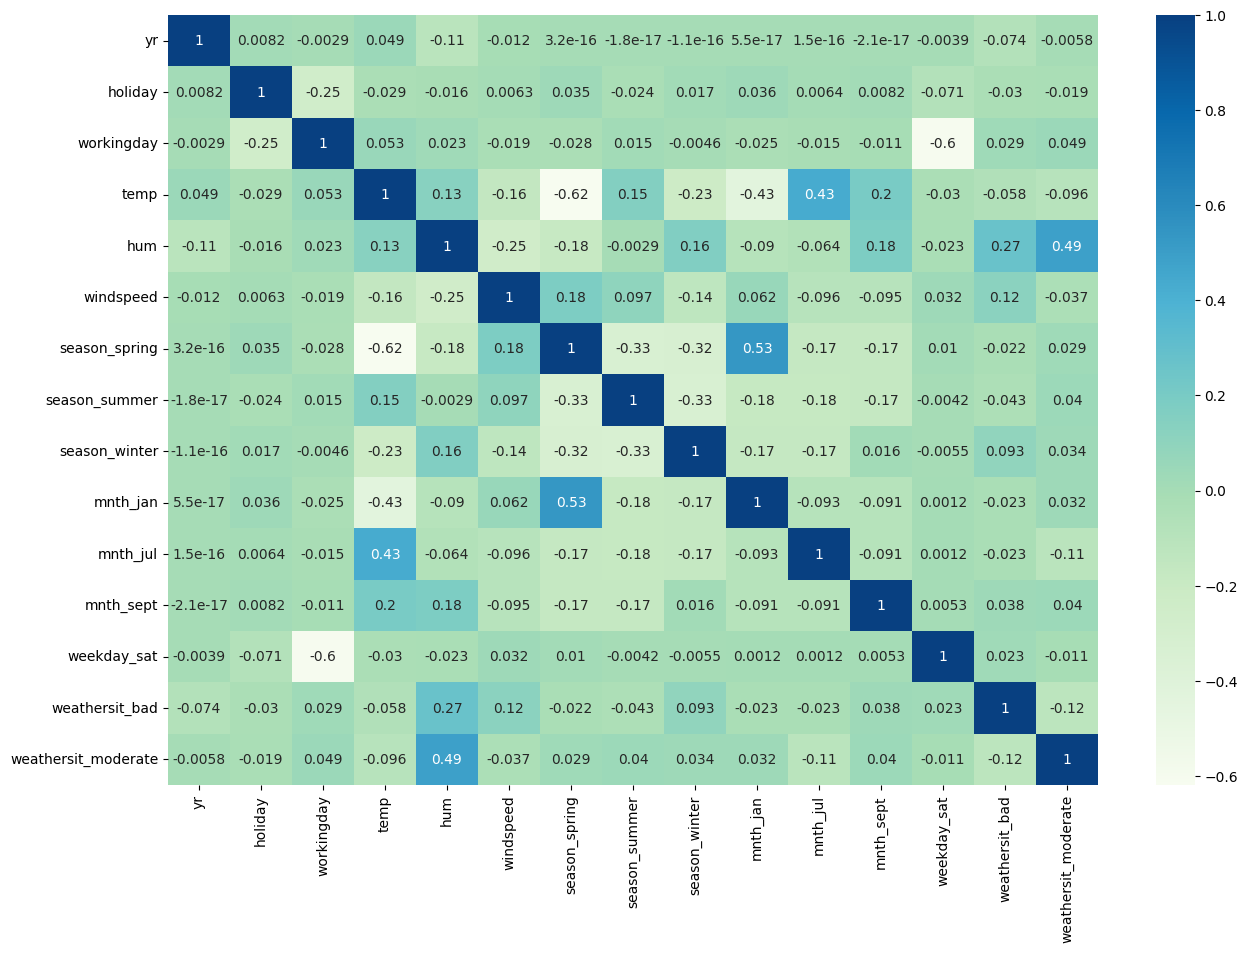

In [477]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(bikeSharing_df[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

_`Inference`_ :

- In this model, we see a quite good R-squared value (80-85%), but few feature shows high p-value and high IVF which needs to be addressed through manual elimination approach.

## Model 2

Dropping the variable 'hum' as it has high IVF value(IVF > 5)

In [478]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'mnth_jan', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     190.0
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          6.18e-189
Time:                        11:16:50   Log-Likelihood:                -4123.8
No. Observations:                 511   AIC:                             8278.
Df Residuals:                     496   BIC:                             8341.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1522.3973    

_`Inference`_ :

- In this model, we see a quite good R-squared value (80-85%) and all p-values are under 0.05, but few feature shows high IVF which needs to be addressed further through manual elimination approach.

## Model 3

#### All the columns have p-value < .05 so checking VIFs

In [479]:
# Dropping the variable temp as it has high VIF value.
cols = ['yr', 'holiday',  'workingday', 'mnth_jan', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.1
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          2.72e-154
Time:                        11:17:12   Log-Likelihood:                -4209.0
No. Observations:                 511   AIC:                             8446.
Df Residuals:                     497   BIC:                             8505.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4749.3035    

_`Inference`_ :

- All other VIF's are less than 5.
- Feature 'mnth_jul' has high p-values.
- In this model, we see R-squared value dropped significantly (78%), and also we have seen earlier that temp has shown high collinearity with the cnt so we will not proceed with dropping temp and add it again.
- Instead we will look to drop second feature with high VIF(windspeed) and mnth_jul with high p-value one by one.

## Module 4

In [480]:
# Adding temp again and dropping mnth_jul as it has p-value > 0.05 
cols = ['yr', 'holiday',  'workingday', 'mnth_jan', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'temp', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.7
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          1.27e-188
Time:                        11:17:28   Log-Likelihood:                -4127.3
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     497   BIC:                             8342.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1452.5833    

_`Inference`_ :

- All other VIF's are less than 5, temp and workingday are slightly above 5. As temp is important feature so we will proceed to drop workingday.
- Feature 'holiday' has borderline p-value slightly above 0.05.
- In this model, we see R-squared value increased to previous level (84%) after adding temp feature.

## Model 5

In [481]:
# Dropping the variable holiday as it has high p-value
cols = ['yr', 'workingday',  'mnth_jan', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'temp', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          5.67e-189
Time:                        11:18:27   Log-Likelihood:                -4129.3
No. Observations:                 511   AIC:                             8285.
Df Residuals:                     498   BIC:                             8340.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1387.2888    

_`Inference`_ :

- All other VIF's are less than 5. 
- All feature have p-value less than 0.05 except weekday_sat
- In this model, we see R-squared value (83.9%).

## Model 6

In [486]:
# Dropping the variable mnth_jan as it is high p-value
cols =['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'temp', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     234.1
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          5.44e-189
Time:                        11:24:05   Log-Likelihood:                -4132.1
No. Observations:                 511   AIC:                             8288.
Df Residuals:                     499   BIC:                             8339.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1234.8118    

_`Inference`_ :

- All feature VIF's are less than 5 except temp. 
- All feature have p-value less than 0.05 
- In this model, we see R-squared value (83.8%).
- As we still have 11 features so lets try to remove another feature 'season_spring' having high p-value in next iteration.

## Model 7

In [494]:
# Dropping the variable season_spring as it is high p-value 
cols =['yr', 'workingday', 'windspeed','season_summer', 
       'season_winter', 'temp', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.7
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          1.13e-188
Time:                        11:34:26   Log-Likelihood:                -4135.7
No. Observations:                 511   AIC:                             8293.
Df Residuals:                     500   BIC:                             8340.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 668.8308    

_`Inference`_ :

- All feature have p-value less than 0.05 (Precisely 0.00 for all selected features)
- All feature VIF's are less than 5
- In this model, we see R-squared value (83.5%) which is in the expected range pf 80-85%.
- Let us select Model 7 as our final as it has all important statistics appropriate (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables.

- Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

In [495]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [496]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'workingday', 'windspeed','season_summer', 
       'season_winter', 'temp', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

668.8307950207309 [ 2030.8264518    492.25940727 -1347.56653883   769.96935003
  1145.81047394  4781.26014052   844.14188046   587.68089616
 -2501.63703369  -699.5311964 ]


## Step 7. Model Evaluation 
### 7.1 Residucal Analysis

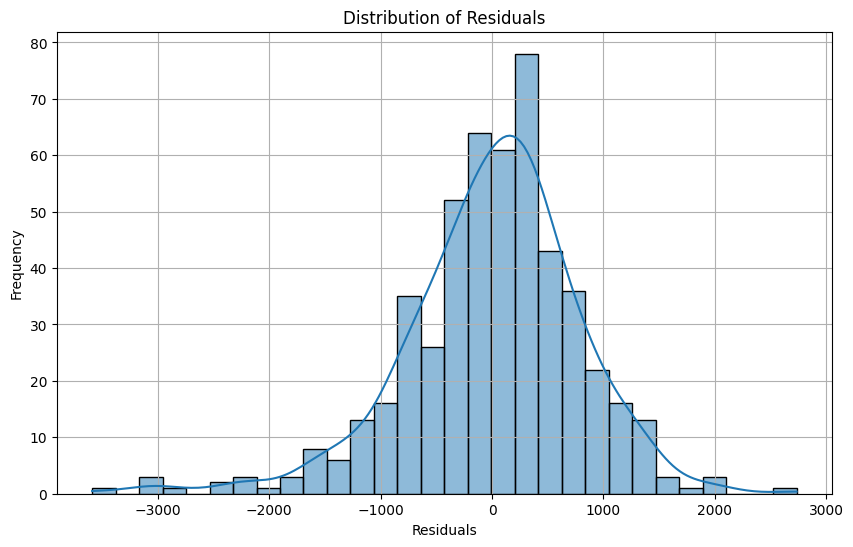

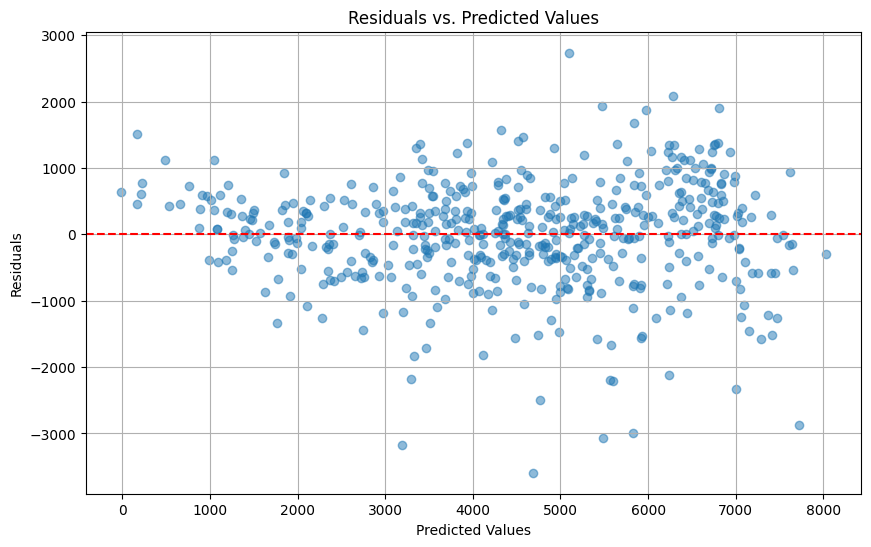

In [497]:
# Calculate residuals
y_train_pred = lr.predict(X_train[cols])
residuals = y_train - y_train_pred

# Plot residuals distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot residuals vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [498]:
y_train_pred = lr.predict(X_train[cols])

In [499]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

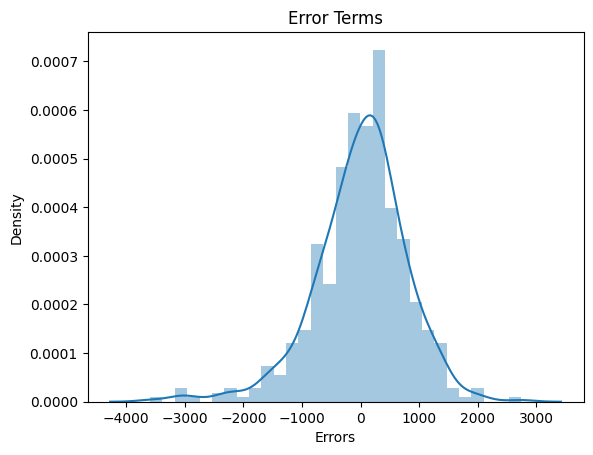

In [500]:
plot_res_dist(y_train, y_train_pred)

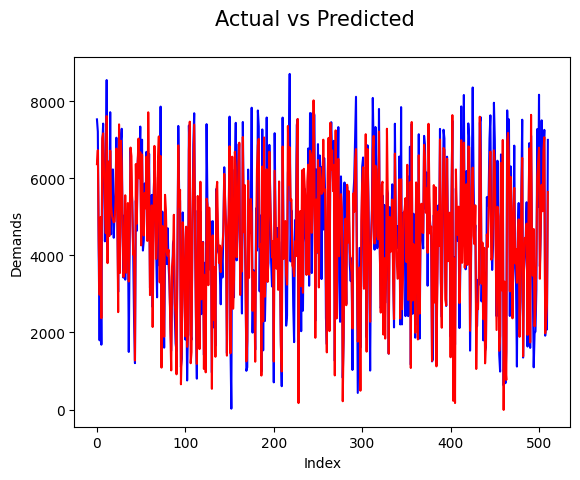

In [501]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Actual and Predicted result following almost the same pattern so this model seems ok

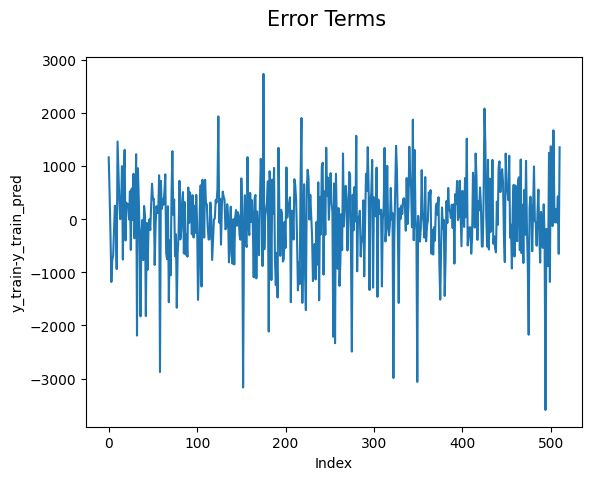

In [502]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

#### Here,If we see the error terms are independent of each other.

In [511]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_train,y_train_pred)

0.8353552167101637

Inference
R2 Same as we obtained for our final model

### 7.2 Linearity Check

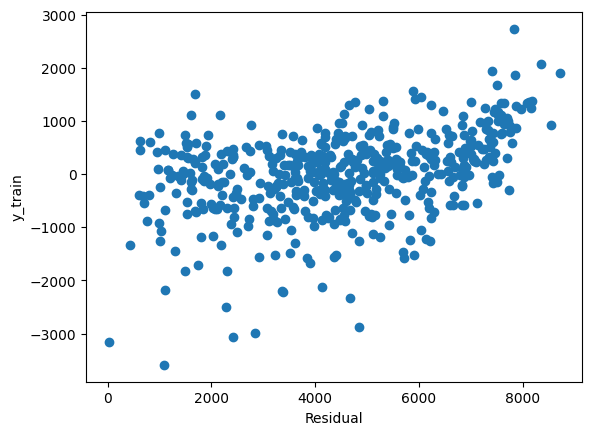

In [506]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()


### 7.3 Predict values for test data set

In [510]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])


In [512]:
#Columns from our final model
cols = ['yr', 'workingday', 'windspeed','season_summer', 
       'season_winter', 'temp', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

### 7.4 R-Squared value for test predictions

In [516]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.7955645438360066

_`Inference`_ :

- R-squared was 83.5 for training data for our selected model 7. Here we get a very good R-square as 79.5 for test data as well.
- So we can say that our model is good and doing prediction with <5% deviation on unseen test data.

### 7.5 Homoscedacity

Text(0, 0.5, 'y_test_pred')

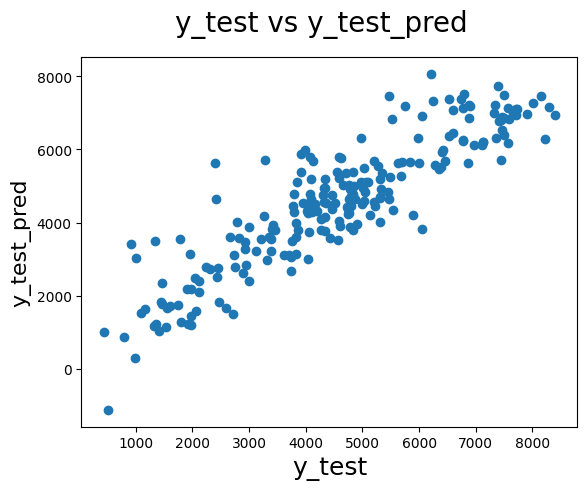

In [517]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

_`Inference`_ :

- We can observe that variance of the residuals (error terms) is constant across predictions and error term does not vary much as the value of the predictor variable changes.


### 7.6 Plot Test vs Predicted test values

In [522]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

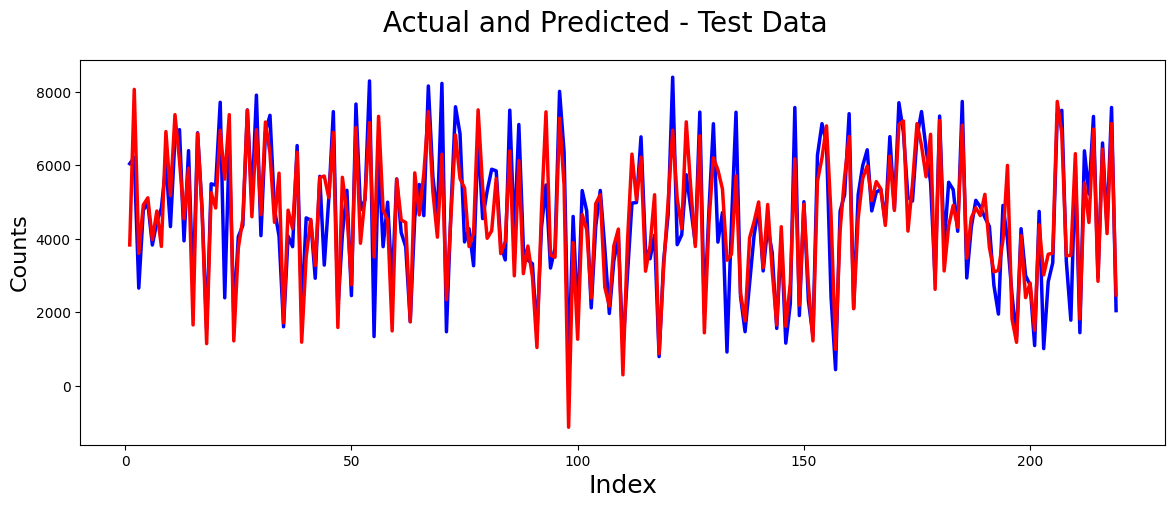

In [523]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

### 7.7 Plot Error Terms for test data

In [524]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

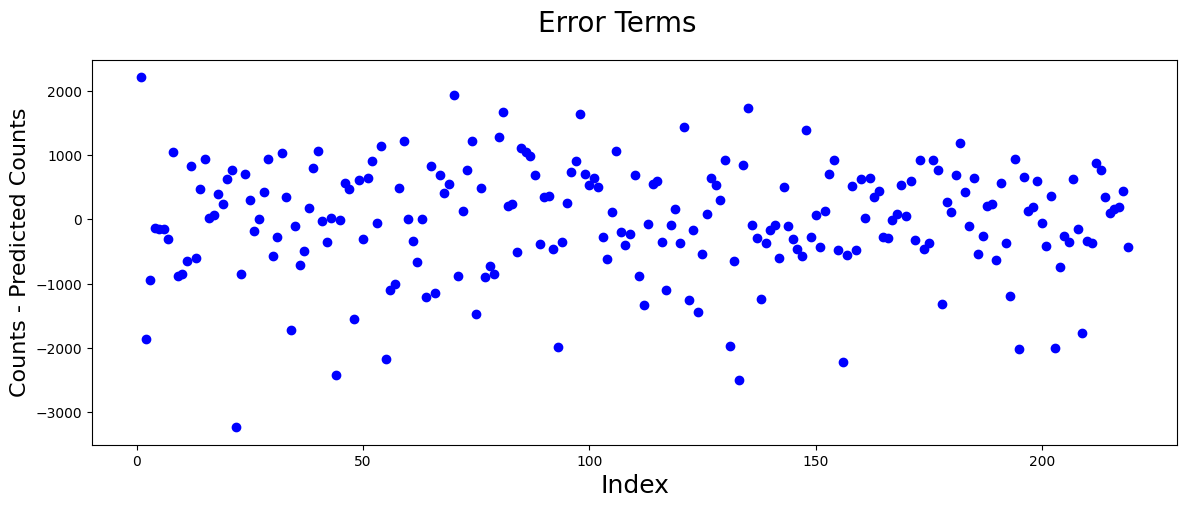

In [525]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

# Making Predictions

In [534]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols =  ['yr', 'workingday', 'windspeed','season_summer', 
       'season_winter', 'temp', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.7
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.13e-188
Time:                        15:41:03   Log-Likelihood:                -4135.7
No. Observations:                 511   AIC:                             8293.
Df Residuals:                     500   BIC:                             8340.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 668.8308    

### Interepretation of results

### Analysing the above model, the company should focus on the following features:
- Company should focus on expanding business during seasons(Summer/winter).
- Company should focus on expanding business during September.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
- There would be less bookings during Light Snow or Rain, they could probably use this time to service the bikes without having business impact.

#### Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.


### _`Conclusion`_
Significant variables to predict the demand for shared bikes
- temp
- windspeed
- workingday
- Season(Summer/Winter)
- months(September)
- Year (2019)
- weathersit
- weekday_sat

pd.__version__